In [32]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [33]:
# hide warning messages
import warnings
warnings.filterwarnings("ignore")

In [34]:
# better plots
sns.set(rc={'figure.figsize':(12,8)});

## Exemplo 1

Considere por exemplo o problema simples de calcular a relação entre as áreas de um quadrado e um círculo que estão inscritos nesse quadrado e tangencia os quatro lados dele. Assuma por exemplo que o círculo tem raio $r = 1$ e, consequentemente, o quadrado tem lado $l = 2$. A solução desse problema é óbvia, pois sabemos que a
relação entre as áreas 

$$
\frac{\pi r^2}{l^2} = \frac{\pi}{4}
$$

In [35]:
# valor do raio
r = 1
# valor do lado
l = 2
# cálculo da relação
(np.pi*r**2)/(l**2)

0.7853981633974483

In [36]:
# ou simplesmente, nesse caso
np.pi/4

0.7853981633974483

Será que podemos resolver esse problema usando o Método de Monte Carlo?

Sim! Note que podemos aproximar a solução respondendo uma pergunta relacionada: Dado que eu sorteio uma vetor de variáveis aletórias $(x, y)$ uniformemente no intervalo $[−1, 1]$ x $[−1, 1]$, qual a probabilidade de ele cair dentro do círculo?


In [37]:
# função que preenche de n pontos um quadrado de lado 2 com
def quadradoCirculo(n):
    nc=0
    plt.axis([-1.5, 1.5, -1.5, 1.5])
    for i in range(0,n):
        x = np.random.uniform(-1.0,1.0)
        y = np.random.uniform(-1.0,1.0)
        # círculo com raio 1
        if (x**2 + y**2 < 1):
            plt.plot([x],[y],'ro')
            nc = nc + 1
        # quadrádo com lado 2    
        else:
            plt.plot([x],[y],'bo')
    """
    a função retorna o número de pontos que se localizam dentro do círculo
    em relação à quantidade pontos dentro do quadrado (total de pontos)
    """             
    return nc/n

0.8

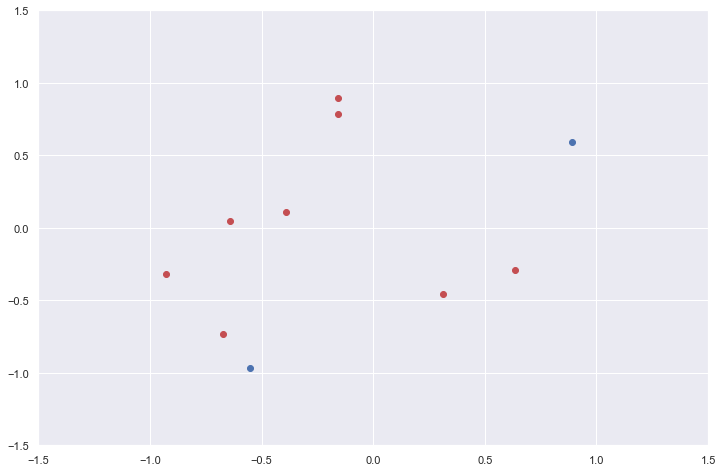

In [38]:
quadradoCirculo(10)

0.75

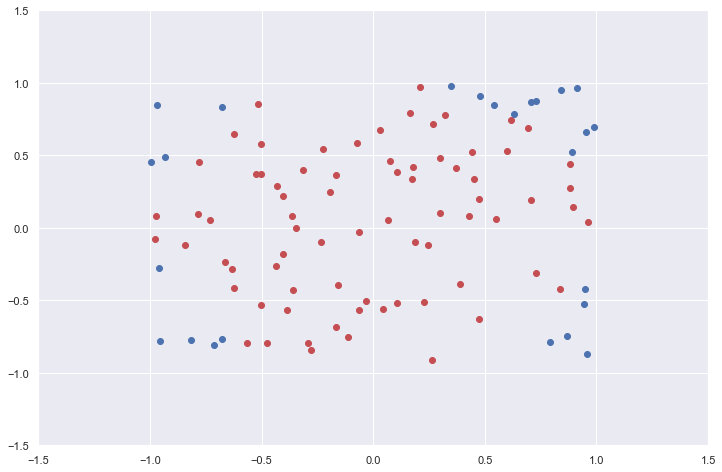

In [39]:
quadradoCirculo(100)

0.777

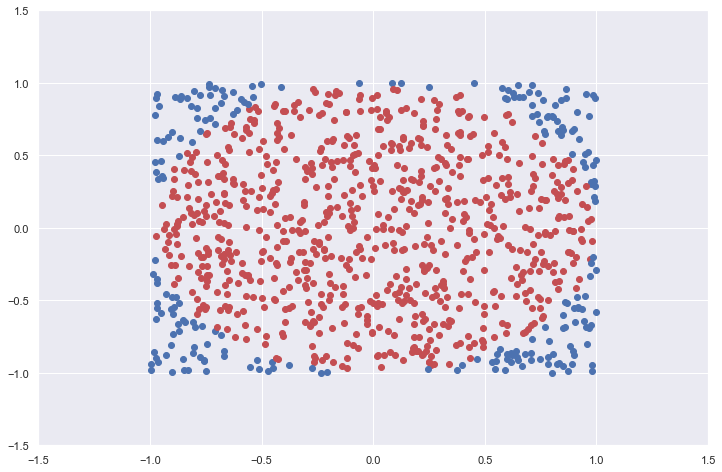

In [40]:
quadradoCirculo(1000)

0.7831

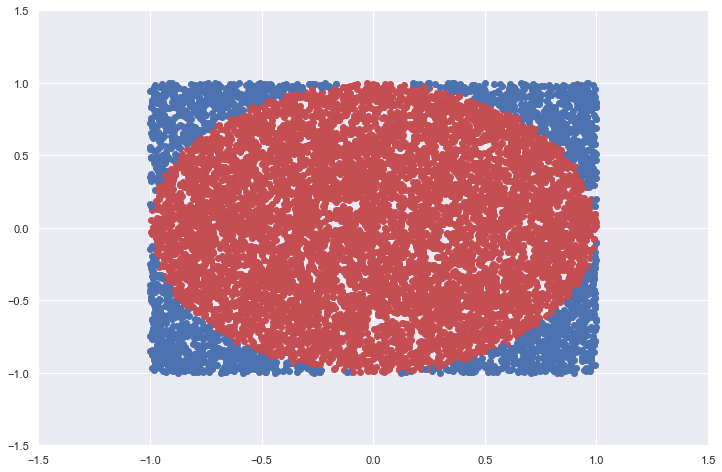

In [41]:
quadradoCirculo(10000)

## Exemplo 2
Suponha que você quer analisar o que ocorre com a distribuição do estimador de mínimos quadrados do coeﬁciente angular da reta dada por $y = \alpha + \beta x + u$ quando aumentamos o tamanho da
amostra. Suponha que $u$ é uma variável aleatória normal padrão e $\alpha = 2$ e $\beta = 3$. Vamos fazer o papel de Deus e gerar os valores de $y$ e usar os vetores $[x, y]$ para estimar os coeﬁcientes $\alpha$ e $\beta$ (embora estejamos aqui particularmente interessados nas estimativas de $\beta$).


Vamos assumir que a variável $x$ tem distribuição normal com média $\mu$ e desvio padrão $\sigma$, isso é $x \sim \mathcal{N}(\mu, \sigma^2)$.

Portando o processo gerador de dados de $y$ é:

$$
    y = \alpha + \beta x + u
$$

onde $x \sim \mathcal{N}(\mu, \sigma^2)$ com $\mu$ e $\sigma$ como parâmetros, $u \sim \mathcal{N}(0, 1)$, $\alpha = 2$ e $\beta = 3$.

In [42]:
def estimation(mu, sigma, n = 100):
    # gerando a variável explicativa e o ruído
    x = np.random.normal(mu, sigma, n)
    u = np.random.normal(0, 1, n)

    # definindo os parâmetros
    alpha = 2
    beta = 3

    # processo gerador de dados de y
    y = alpha + beta*x + u

    # retorna as variáveis x e y
    return(x, y)    

In [43]:
# usando mu = 5 e sigma = 4 para a distribuição de x
x, y = estimation(5, 4)

In [44]:
def OLSregression(x, y):
    # criando um dataframe para rodar a regressao
    ols = pd.DataFrame()

    # declarando as variáveis
    ols['y'] = y
    ols['x'] = x

    # guardando os resultados da regressao
    result = sm.ols(formula="y ~ x", data=ols).fit()

    # função retorna as os parâmetros alpha e beta estimados por OLS
    return(result.params[0], result.params[1])

In [61]:
def estimates_distribution(sampleSize, numberSamples):
    alpha_vector = []
    beta_vector = []

    mu = 5
    sigma = 4

    for i in range(numberSamples):
        x, y = estimation(mu, sigma, sampleSize)
        alpha, beta = OLSregression(x, y)
        alpha_vector.append(alpha)
        beta_vector.append(beta)

    
    mean_alpha = np.mean(alpha_vector)
    mean_beta = np.mean(beta_vector)

    # two plots side-by-side setup
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # alpha distribution
    axes[0].hist(alpha_vector, bins=30)
    alpha_title = f'Alpha Distribution with {numberSamples} simulations and Sample Size of {sampleSize}'
    axes[0].set_title(alpha_title)

    # beta distribution
    axes[1].hist(beta_vector, bins=30)
    beta_title = f'Bete Distribution with {numberSamples} simulations and Sample Size of {sampleSize}'
    axes[1].set_title(beta_title)

    return(mean_alpha, mean_beta)

(2.0364810515993605, 2.9774488313523397)

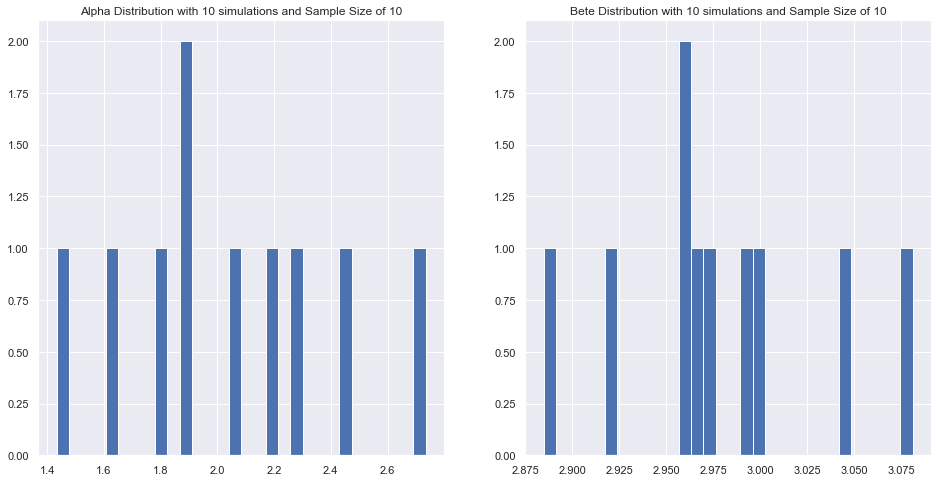

In [62]:
estimates_distribution(10, 10)

(2.010679858486533, 2.9994874727805465)

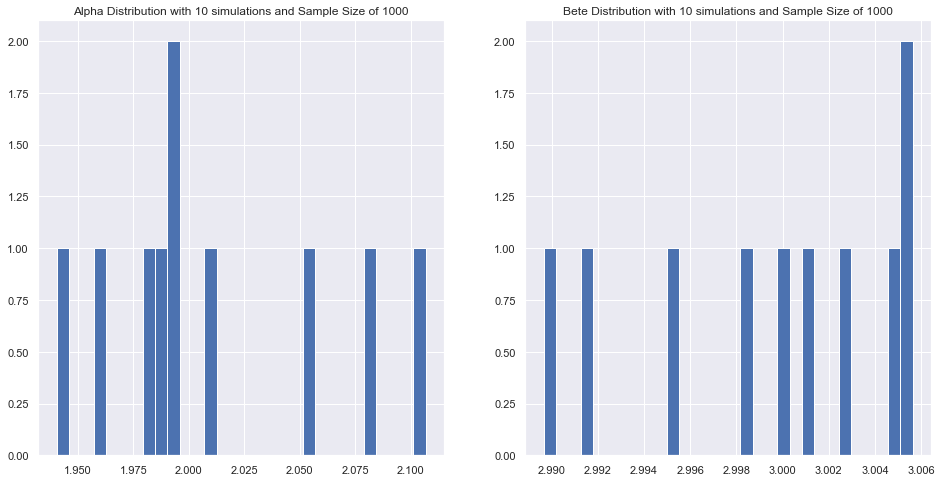

In [63]:
estimates_distribution(1000, 10)

(2.0013840132369887, 2.9976982850601326)

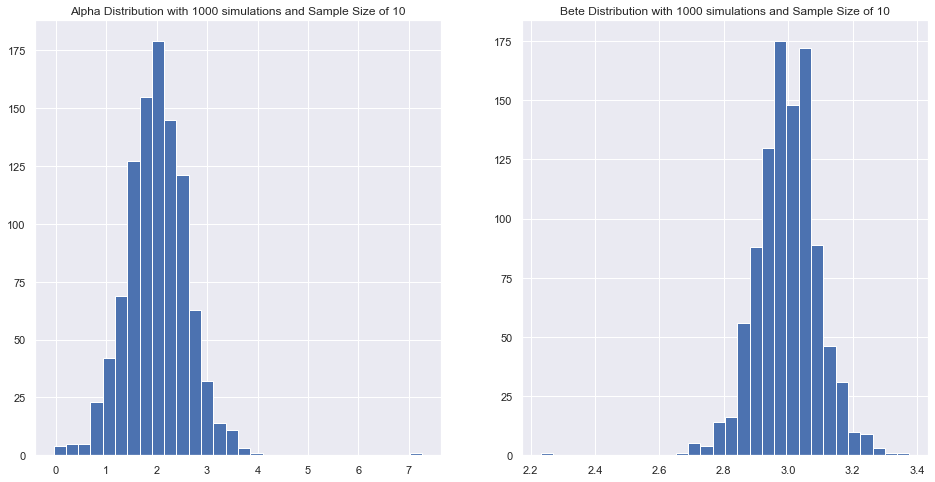

In [64]:
estimates_distribution(10, 1000)

(2.0016613601145714, 2.9997320995908265)

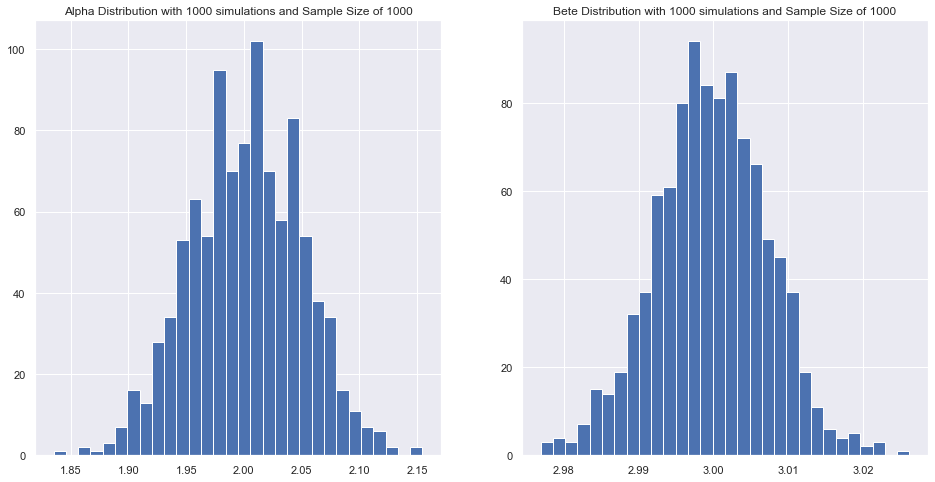

In [65]:
estimates_distribution(1000, 1000)